In [ ]:
# 합성곱 신경망의 시각화
# 합성곱 신경망의 특성 맵을 시각화하면 동작 원리 통찰력을 키울 수 있다.
# 함수형 API도 배워보자.

from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
!wget https://github.com/Poxios/Study/raw/master/03.%20Machine%20Learning/01.%20%ED%98%BC%EC%9E%90%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Extra/best-cnn-model.h5 -O bestmodel.h5
model = keras.models.load_model('bestmodel.h5')

--2022-05-15 04:28:09--  https://github.com/Poxios/Study/raw/master/03.%20Machine%20Learning/01.%20%ED%98%BC%EC%9E%90%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Extra/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Poxios/Study/master/03.%20Machine%20Learning/01.%20%ED%98%BC%EC%9E%90%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Extra/best-cnn-model.h5 [following]
--2022-05-15 04:28:09--  https://raw.githubusercontent.com/Poxios/Study/master/03.%20Machine%20Learning/01.%20%ED%98%BC%EC%9E%90%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Extra/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserc

(3, 3, 1, 32) (32,)
-0.014175367 0.23105967


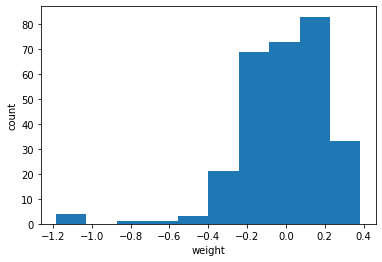

In [ ]:
from tensorflow import keras
model.layers
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 학습한 가중치를 히스토그램으로 나타낸건데, 종 모양이다. 무슨 의미가 있는건가?

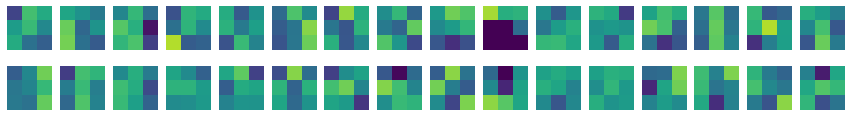

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

(3, 3, 1, 32)
-0.0044554006 0.08333051


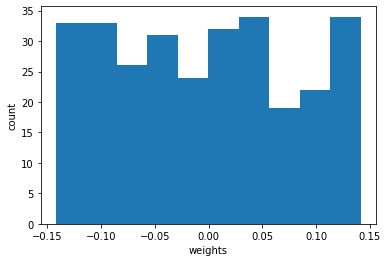

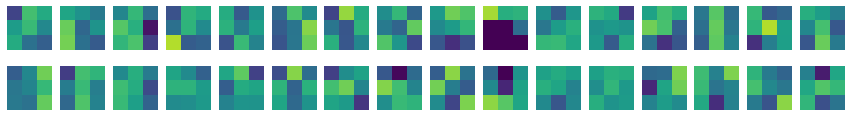

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

# 이렇게 하면 마치 inputs가 dense1을 통과해서 hidden이 나온것 처럼 된다!
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


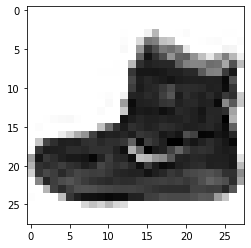

(1, 784)


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()
# inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
inputs = train_input[0:1].reshape(-1,784)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

# 여기 코드 작동이 안됨. 이해도 잘 안됨. p.474 ~ p.478은 나중에 필요하면 다시 볼 것.